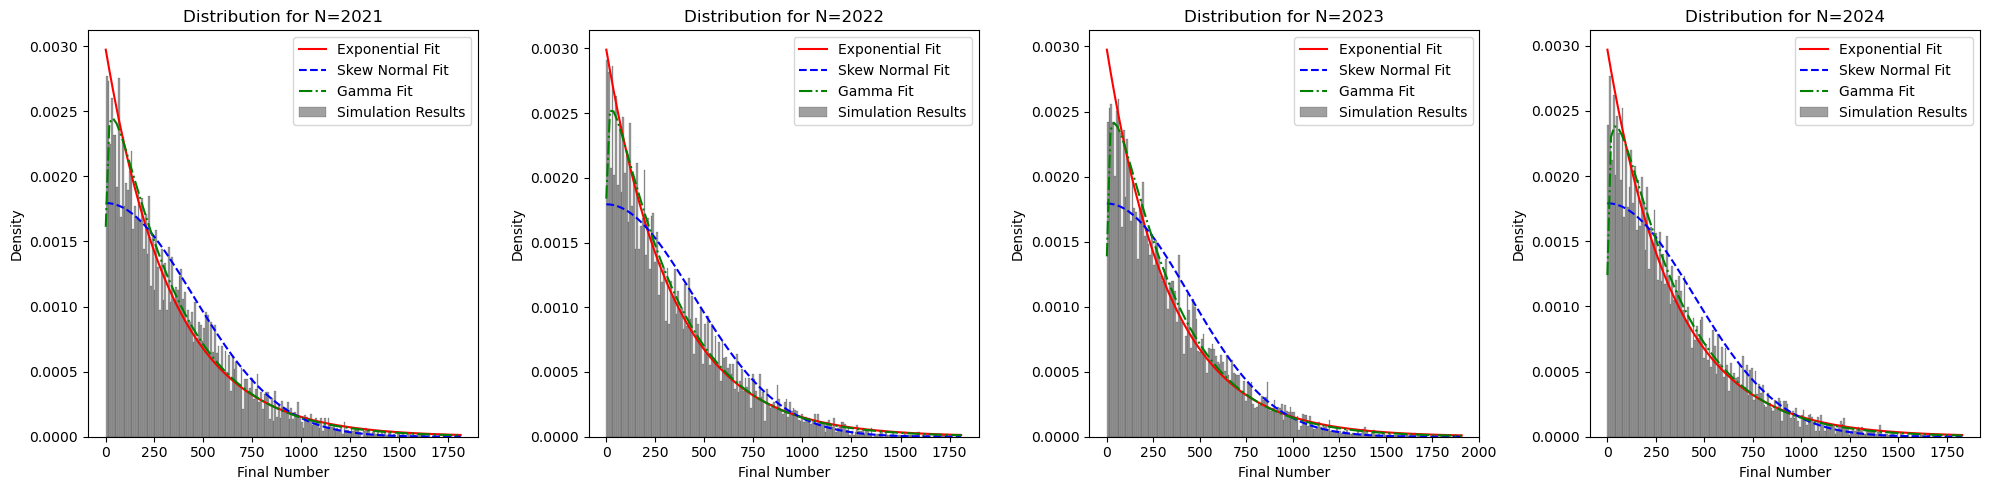

In [13]:
from random import sample
import matplotlib.pyplot as plt
from scipy.stats import expon, skewnorm, gamma
import seaborn as sns
import numpy as np

def simulate_paper_draw(n):
    papers = list(range(1, n + 1))  # Create a list of papers numbered 1 through n
    
    while len(papers) != 1:
        a, b = sample(papers, 2)  # Draw two papers randomly
        papers.remove(a)  # Remove the first drawn number
        papers.remove(b)  # Remove the second drawn number
        difference = abs(b - a)  # Calculate the absolute difference
        papers.append(difference)
        
    return papers[0]  # Return the remaining paper
 
# Adjusting to run a smaller number of simulations to avoid timeout
simulations = 10**4  # Reduced number of simulations for quicker computation

# Adjusting the provided code to output simulations for 2021, 2022, 2023, 2024 in 4 columns with 1 row
# and plot the exponential, skewnorm, and gamma distribution on each of them.
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 4 columns with 1 row

numbers = [2021, 2022, 2023, 2024]

for i, number in enumerate(numbers):
    # Run simulations
    results = [simulate_paper_draw(number) for _ in range(simulations)]
    
    # Fit distributions
    params_exp = expon.fit(results)
    loc_exp, scale_exp = params_exp
    
    params_skew = skewnorm.fit(results)
    a_skew, loc_skew, scale_skew = params_skew
    
    params_gamma = gamma.fit(results)
    a_gamma, loc_gamma, scale_gamma = params_gamma
    
    # Generate points for the fitted distributions
    x_values = np.linspace(min(results), max(results), 100)
    fitted_exp_pdf = expon.pdf(x_values, loc_exp, scale_exp)
    fitted_skew_pdf = skewnorm.pdf(x_values, a_skew, loc_skew, scale_skew)
    fitted_gamma_pdf = gamma.pdf(x_values, a_gamma, loc_gamma, scale_gamma)
    
    # Plotting
    ax = axes[i]
    sns.histplot(results, bins=200, stat='density', color='gray', edgecolor='black', label='Simulation Results', ax=ax)
    ax.plot(x_values, fitted_exp_pdf, 'r', label='Exponential Fit')
    ax.plot(x_values, fitted_skew_pdf, 'b--', label='Skew Normal Fit')
    ax.plot(x_values, fitted_gamma_pdf, 'g-.', label='Gamma Fit')
    ax.set_title(f'Distribution for N={2021+i}')
    ax.set_xlabel('Final Number')
    ax.set_ylabel('Density')
    ax.legend()

plt.savefig('distribution_plots_2.jpg', format='jpg', dpi=300)
plt.tight_layout()
plt.show()